In [ ]:
'''
Stochastic SEIR Epidemic Dynamics on Scale-Free Networks

This project simulates the spread of a generic infectious disease on a heterogeneous contact network using a stochastic SEIR model with finite daily contacts.
This is a baseline model that assumes: closed population, permanent immunity after recovery, finite daily contacts per individual and scale free contact.
THIS MODEL WILL ALWAYS PRODUCE A SINGLE WAVE EPIDEMIC!!!!!
'''

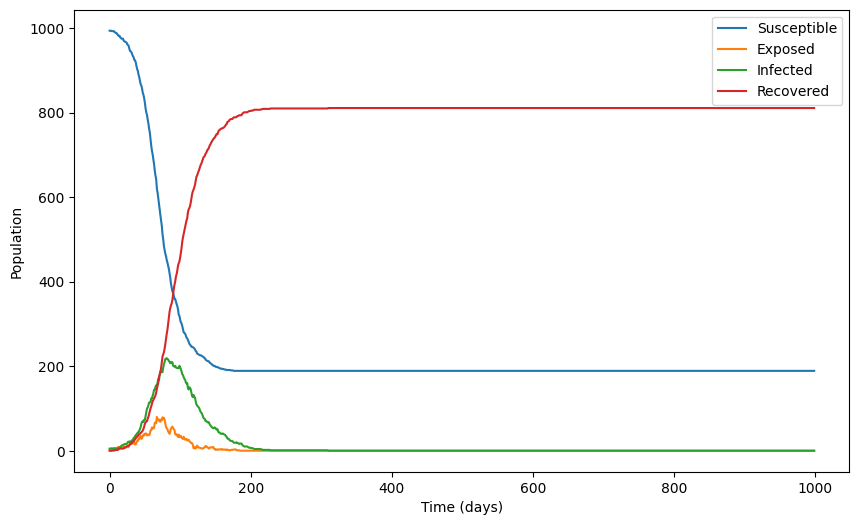

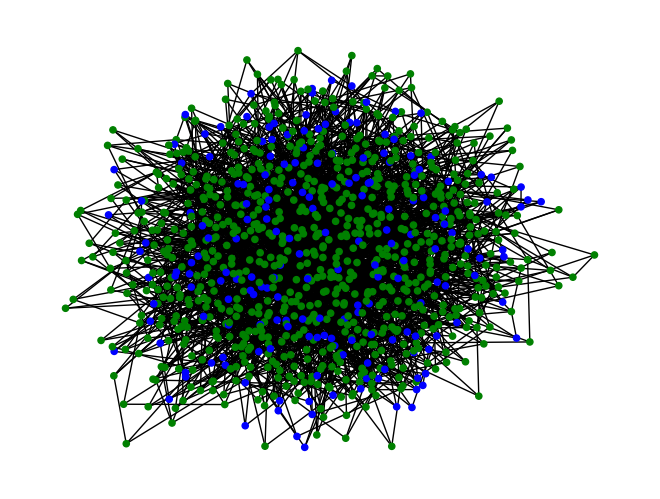

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

N = 1000 # number of nodes (people)
G = nx.barabasi_albert_graph(N, m=3) 

states = {node: "S" for node in G.nodes()}

# initial infected peeps
initial_infected = np.random.choice(list(G.nodes()), size=5, replace=False)
for node in initial_infected:
    states[node] = "I"

# disease spread parameters 
beta   = 0.05    # infection probability per contact
sigma  = 0.2     # probability that the exposed get infected
gamma  = 0.05    # recovery probability for the infected
contacts_per_day = 6

# single step of simulation
def step(G, states):
    new_states = states.copy()

    for node in G.nodes():

        # infected people
        if states[node] == "I":

            neighbors = list(G.neighbors(node))
            if len(neighbors) == 0:
                continue

            contacts = np.random.choice(
                neighbors,
                size=min(len(neighbors), contacts_per_day),
                replace=False
            )

            for nbr in contacts:
                if states[nbr] == "S":
                    if np.random.rand() < beta:
                        new_states[nbr] = "E"

            # recovered people
            if np.random.rand() < gamma:
                new_states[node] = "R"

        # Exposed people
        elif states[node] == "E":
            if np.random.rand() < sigma:
                new_states[node] = "I"

    return new_states

# main simulation
T = 1000
S_hist, E_hist, I_hist, R_hist = [], [], [], []

for t in range(T):
    states = step(G, states)

    S_hist.append(sum(1 for s in states.values() if s == "S"))
    E_hist.append(sum(1 for s in states.values() if s == "E"))
    I_hist.append(sum(1 for s in states.values() if s == "I"))
    R_hist.append(sum(1 for s in states.values() if s == "R"))

# plot
plt.figure(figsize=(10,6))
plt.plot(S_hist, label="Susceptible")
plt.plot(E_hist, label="Exposed")
plt.plot(I_hist, label="Infected")
plt.plot(R_hist, label="Recovered")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()
plt.show()

color_map = []
for node in G.nodes():
    if states[node] == "S":
        color_map.append("blue")
    elif states[node] == "I":
        color_map.append("red")
    elif states[node] == "E":
        color_map.append("purple")        
    else:
        color_map.append("green")

nx.draw(G, node_color=color_map, node_size=20)
plt.show()

